## Obtain
- PFL data was obtained via web scraping and shared through teams chat
- downloaded data file to SU onedrive folder to easily load into jupyter notebook


In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import re

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## Scrub

In [5]:
#Load  the dataset from one drive

charlie_path = r"C:\Users\Charlie Vanleuvan\OneDrive - Syracuse University\IST 718 Big Data Analytics\Final Project\PFL_Rolling_DB2.csv"
mark_path = r"C:\Users\mparadis\Syracuse University\IST 718 - General\Data\PFL_Rolling_DB2.csv"

pfl = pd.read_csv(mark_path)
pfl.head(5)

,Date,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,...,Opp Outer Zone,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win
0,6/7/2018 0:00,Francimar Barroso,7,7,0,0,0,0,0,0,...,0.702,0.0,0.0,0.0,0.287093,NaN,0.0,-335,1,1
1,6/7/2018 0:00,Daniel Gallemore,0,0,7,7,0,0,0,0,...,0.000,0.0,0.0,0.0,-0.287093,NaN,0.0,255,0,0
2,6/7/2018 0:00,Alexandre Almeida,0,0,2,3,4,4,0,0,...,0.000,0.0,0.0,NaN,0.303571,NaN,NaN,-2000,1,1
3,6/7/2018 0:00,Lee Coville,2,3,0,0,0,0,4,4,...,0.000,0.0,0.0,0.0,-0.303571,NaN,NaN,1100,0,0
4,6/7/2018 0:00,Magomed Idrisov,1,2,0,1,13,13,0,1,...,0.000,31.0,0.0,NaN,0.275287,0.5,1.0,-2000,0,0


In [6]:
#number of columns
print(len(pfl.columns))

#column data types
print(pfl.dtypes)

57
Date                              object
Fighter                           object
Sig. Str. Leg                      int64
Sig. Str. Leg Attempts             int64
Opp Sig. Str. Leg                  int64
Opp Sig. Str. Leg Attempts         int64
Sig. Str. Ground Landed            int64
Sig. Str. Ground Attempts          int64
Opp Sig. Str. Ground Landed        int64
Opp Sig. Str. Ground Attempts      int64
Total Strikes Landed               int64
Total Strikes Attempts             int64
Opp Total Strikes Landed           int64
Opp Total Strikes Attempts         int64
Total Takedowns Landed             int64
Total Takedowns Attempts           int64
Opp Total Takedowns Landed         int64
Opp Total Takedowns Attempts       int64
Submission Total Attempts          int64
Opp Submission Total Attempts      int64
Takedown %                       float64
Opp Takedown %                   float64
Sig. Str. Leg %                  float64
Opp Sig. Str. Leg %              float64
Sig. Str. Gro

In [7]:
#any columns have NaN?
print(pfl.isna().sum())

Date                               0
Fighter                            0
Sig. Str. Leg                      0
Sig. Str. Leg Attempts             0
Opp Sig. Str. Leg                  0
Opp Sig. Str. Leg Attempts         0
Sig. Str. Ground Landed            0
Sig. Str. Ground Attempts          0
Opp Sig. Str. Ground Landed        0
Opp Sig. Str. Ground Attempts      0
Total Strikes Landed               0
Total Strikes Attempts             0
Opp Total Strikes Landed           0
Opp Total Strikes Attempts         0
Total Takedowns Landed             0
Total Takedowns Attempts           0
Opp Total Takedowns Landed         0
Opp Total Takedowns Attempts       0
Submission Total Attempts          0
Opp Submission Total Attempts      0
Takedown %                         0
Opp Takedown %                     0
Sig. Str. Leg %                    0
Opp Sig. Str. Leg %                0
Sig. Str. Ground %                 0
Opp Sig. Str. Ground %             0
Total Strikes %                    0
O

In [8]:
#there are 54 factors in this data set, not including fighter name and date
print(pfl.columns[2:-1])

print("There are {} attributes.".format(len(pfl.columns[2:-1])))

Index(['Sig. Str. Leg', 'Sig. Str. Leg Attempts', 'Opp Sig. Str. Leg',
       'Opp Sig. Str. Leg Attempts', 'Sig. Str. Ground Landed',
       'Sig. Str. Ground Attempts', 'Opp Sig. Str. Ground Landed',
       'Opp Sig. Str. Ground Attempts', 'Total Strikes Landed',
       'Total Strikes Attempts', 'Opp Total Strikes Landed',
       'Opp Total Strikes Attempts', 'Total Takedowns Landed',
       'Total Takedowns Attempts', 'Opp Total Takedowns Landed',
       'Opp Total Takedowns Attempts', 'Submission Total Attempts',
       'Opp Submission Total Attempts', 'Takedown %', 'Opp Takedown %',
       'Sig. Str. Leg %', 'Opp Sig. Str. Leg %', 'Sig. Str. Ground %',
       'Opp Sig. Str. Ground %', 'Total Strikes %', 'Opp Total Strikes %',
       'KnockDown Total', 'Opp KnockDown Total', 'KnockDown Total Difference',
       'Ground Time', 'Opp Ground Time', 'Standing Time', 'Opp Standing Time',
       'Dominant Positions', 'Opp Dominant Positions', 'Top Strike Speed',
       'Opp Top Strike Spe

In [9]:
#how many different fighters?
print(pfl['Fighter'].unique())

print("There are {} fighters.".format(len(pfl['Fighter'].unique())))

['Francimar Barroso' 'Daniel Gallemore' 'Alexandre Almeida' 'Lee Coville'
 'Magomed Idrisov' 'Steven Siler' 'Caio Alencar' 'Kelvin Tiller'
 'Marcos Galvao' 'Nazareno Malegarie' 'Jared Rosholt' 'Valdrin Istrefi'
 'Alex Nicholson' 'Jake Heun' 'Timur Valiev' 'Max Coga' 'Lance Palmer'
 'Bekbulat Magomedov' 'Andre Harrison' 'Jumabieke Tuerxun' 'Josh Copeland'
 'Jack May' 'Dan Spohn' 'Bozigit Ataev' 'Chris Wade' 'Natan Schulte'
 'Thiago Tavares' 'Robert Watley' 'Maxim Grishin' 'Jason Butcher'
 'Rakim Cleveland' 'Rashid Yusupov' 'Vinny Magalhaes' 'Jamie Abdallah'
 'Islam Mamedov' 'Yuki Kawana' 'Smealinho Rama' 'Brandon Halsey'
 'Ronny Markes' "Sean O'Connell" 'Efrain Escudero' 'Jason High'
 'Kayla Harrison' 'Brittney Elkin' 'Brian Foster' 'Ramsey Nijem'
 'Luiz Firmino' 'Will Brooks' 'Bojan Velickovic' 'Jonatan Westin'
 'Danillo Villefort' 'Abus Magomedov' 'Rex Harris' 'Andre Lobato'
 'Louis Taylor' 'Anderson Goncalves' 'Bruno Santos' 'Sadibou Sy'
 'Joao Zeferino' 'Paul Bradley' 'Herman Terrad

In [10]:
#fill in the NaN values with the mean of that Series
values = {'Sig. Str. Leg Diff':pfl['Sig. Str. Leg Diff'].mean(),
            'Sig. Str. Punches Diff':pfl['Sig. Str. Punches Diff'].mean(),
            'Sig. Str. Diff':pfl['Sig. Str. Diff'].mean(),
            'Sig. Str. Ground Diff':pfl['Sig. Str. Ground Diff'].mean()}

pfl.fillna(value = values, inplace = True)

In [11]:
#Need to clean the height column. It is in x'y" format. Needs to be in inches
def height_in_inches(x):
    x = re.sub(r"\\","",x)
    try:
        height = re.findall(pattern = r"\d+", string = x)
        feet = int(height[0]) * 12
        inches = int(height[1])

        new_height = feet + inches
        return(new_height)
    except IndexError:
        x = re.sub('"',"",x)
        return(int(x))

In [12]:
#apply the function
pfl['Height'] = pfl['Height'].apply(height_in_inches)


## Explore

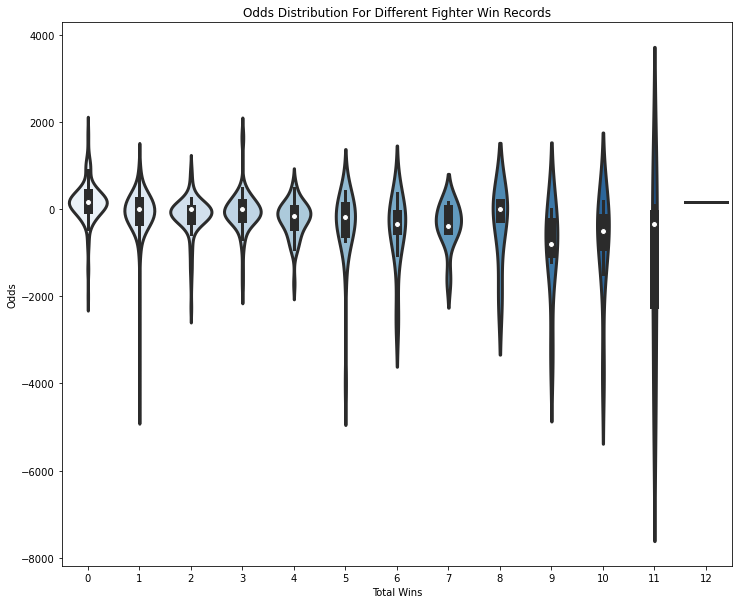

In [51]:
#Plot the distribution of __ vs. # of wins a fighter has
plt.figure(figsize = (12,10))
sns.violinplot(x = pfl['Total Wins'], y = pfl['Odds'], linewidth=3, palette="Blues")
plt.title("Odds Distribution For Different Fighter Win Records")
plt.savefig('old violin.jpg')

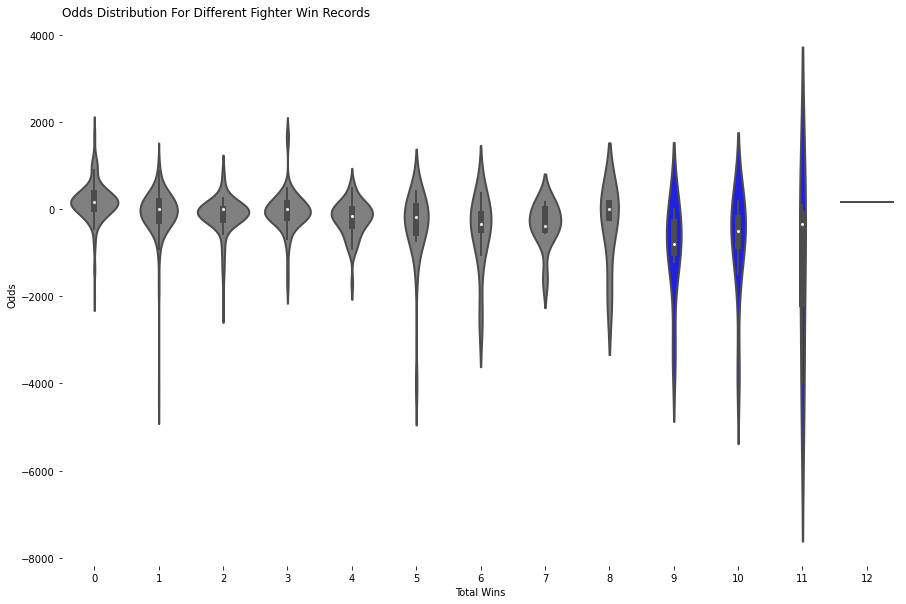

In [50]:
#Plot the distribution of __ vs. # of wins a fighter has
fig, ax = plt.subplots(figsize = (15,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
col_pall = {wins: 'blue' if wins >=9 else 'grey' for wins in pfl['Total Wins']} 
sns.violinplot(ax = ax, x = pfl['Total Wins'], y = pfl['Odds'], linewidth=2, palette = col_pall) #"box", "quartile", "point", "stick"
plt.title("Odds Distribution For Different Fighter Win Records",loc='left')
plt.savefig('new violin.jpg')

In [35]:
for wins in pfl['Total Wins'].unique():
    if wins >=9:
        print('red')
    else:
        print('grey')

grey
grey
grey
grey
grey
grey
grey
grey
grey
red
red
red
red


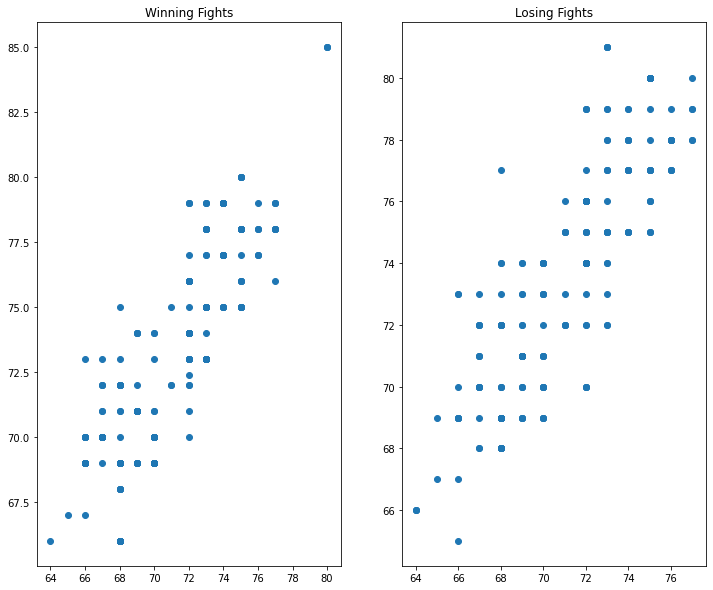

In [107]:
#remove the 0 reach fighters
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,10))
ax1.scatter(pfl[(pfl['Reach'] != 0) & (pfl['Win'] == 1)]['Height'], pfl[(pfl['Reach'] != 0) & (pfl['Win'] == 1)]['Reach'])
ax2.scatter(pfl[(pfl['Reach'] != 0) & (pfl['Win'] == 0)]['Height'],pfl[(pfl['Reach'] != 0) & (pfl['Win'] == 0)]['Reach'])

ax1.set_title("Winning Fights")
ax2.set_title("Losing Fights")
plt.show()


## Model

In [10]:
#data set that will be used for creating training and test split
# dont need the fighter name, date
df = pfl[pfl.columns[2:]]

#create predictor and response sets
x = df[df.columns[:-1]]
y = df['Win']

#test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)


In [12]:
#create the RandomForest Classifier. Start with default model params
clf = RandomForestClassifier(n_estimators = 100, max_depth = None, max_features= "auto", random_state = 10)

#fit the RFC to the training data
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [18]:
print("Test score")
print(clf.score(x_test,y_test))

print("Training score")
clf.score(x_train, y_train)

Test score
0.7307692307692307
Training score


0.9980694980694981

In [19]:
#Get a confusion matrix
from sklearn.metrics import confusion_matrix

#get TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(x_test)).ravel()

print(tn,fp,fn,tp) #more false positives than false negatives

42 25 10 53


Testing scores:
[0.81481481 0.77777778 0.76923077 0.8        0.88      ]
Average accuracy score from k-fold validation is 0.81


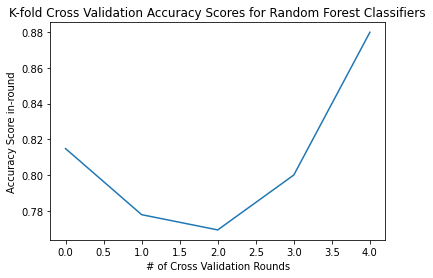

In [33]:
#Cross validate
from sklearn.model_selection import cross_validate

#run 5-fold CV
cv_results = cross_validate(clf, x_test, y_test, cv = 5)

#print the accuracy scores
print("Testing scores:")
print(cv_results['test_score'])
print("Average accuracy score from k-fold validation is {:.2f}".format(sum(cv_results['test_score'] / len(cv_results['test_score']))))

#plot the accuracy change through the rounds of testing
plt.plot(cv_results['test_score'])
plt.xlabel("# of Cross Validation Rounds")
plt.ylabel("Accuracy Score in-round")
plt.title("K-fold Cross Validation Accuracy Scores for Random Forest Classifiers")
plt.show()

## Bring it back into perspective
 - Fight prediction success rate is quite good for sports. Typically 55-60% is very high 
 - However, profitability is entirely dependent on the average odds
 - if the model prediction accuracy rate is higher than the average odds break even rate, then we can consider this a valid betting strategy

In [38]:
#Average odds across all fighters in matchups
#first need to calculate decimal odds from american odds
decimal_odds = [(100/abs(i)) if (i<0) else (i/100) for i in pfl['Odds']]

#calculate the average decimal Odds
average_decimal_odds = sum(decimal_odds) / len(decimal_odds)
print("Average Decimal Odds are: {:.2f}".format(average_decimal_odds))

#calculate break even win rate
print("Break-even win rate: {:.2f}".format((1/average_decimal_odds) * 100))

Average Decimal Odds are: 1.52
Break-even win rate: 65.75


## Putting this into action
 - With a prediction success rate of 82%, we can reasonably expect to predict the winner of the fight 82% of the time
 - The average odds for all fights in our data set is 1.52 (in decimal form), which is roughly an average moneyline odds of -190
 - The breakeven win percentage for the average odds across the entire data set is 65.75%. This is the number of bets we would need to win to at least break even, given that the average odds remain at -190 and the wagered amount remains the same for all bets
 - Following this strategy, we can expect to have a 17% edge over the sportsbooks, which is positive expected value, thus giving us a profitable strategy